# Central Limit Theorem

$$
X_i \in \text{N}(\mu, \sigma)
$$

$$
\bar{X} = \frac{1}{n} \sum X_i
$$

$$
\sqrt{n} (\bar{X}-\mu) \rightarrow \text{N}(0,\sigma^2), n \rightarrow \infty
$$

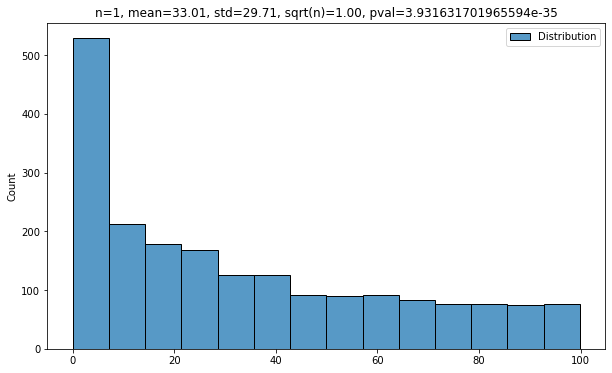

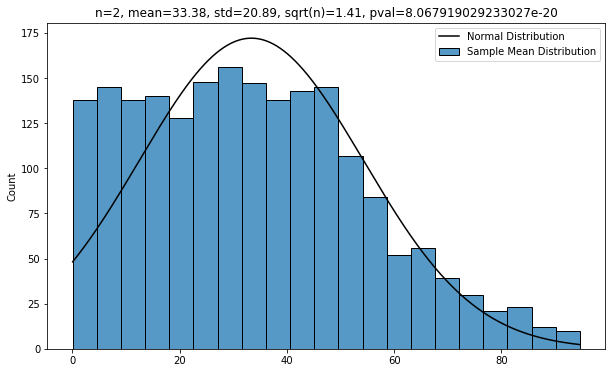

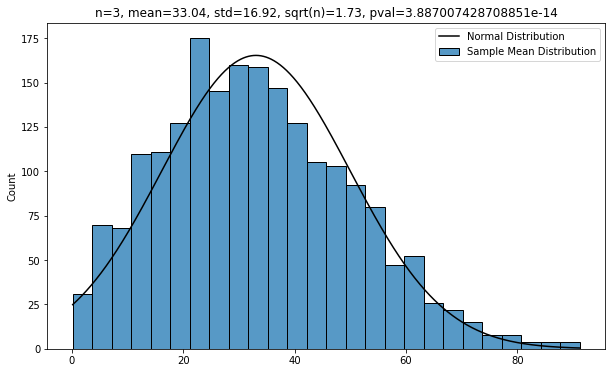

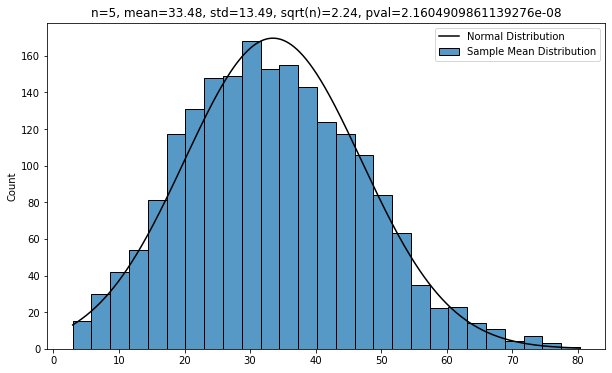

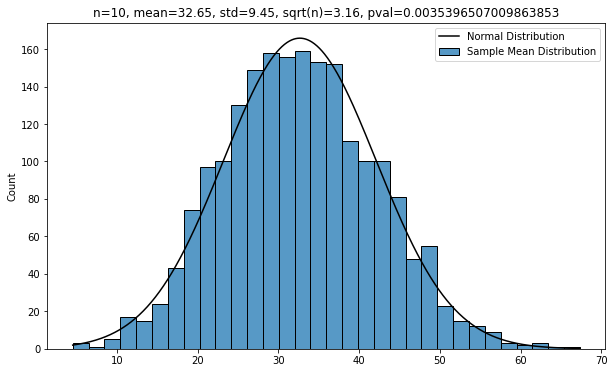

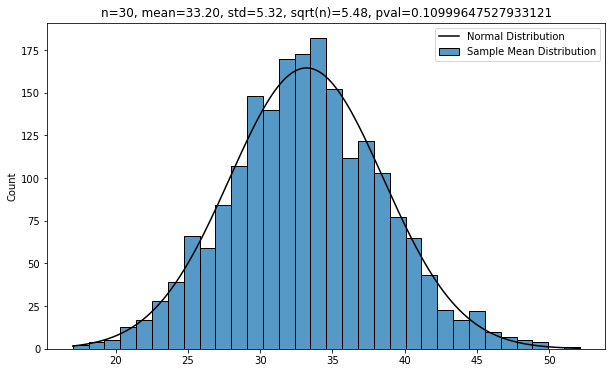

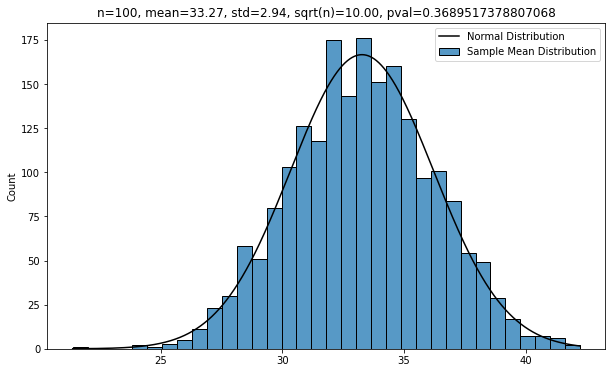

In [15]:
%matplotlib inline
import random
import math
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

def clt(n, N):
    XX = []
    for j in range(N):
        X=[100*(random.random())**2 for i in range(0, n)]
        XX.append(np.mean(X))

    bins = np.histogram_bin_edges(XX, bins='auto')
    minb, maxb, lenb = np.min(bins), np.max(bins), len(bins)
    size = (maxb-minb)/lenb
    
    mean, std = np.mean(XX), np.std(XX)
    pval = scipy.stats.shapiro(XX).pvalue

    plt.figure(figsize=(10,6))
    sns.histplot(data=XX, bins=lenb, label='Sample Mean Distribution' if n>1 else 'Distribution')
    plt.title("n={}, mean={:.2f}, std={:.2f}, sqrt(n)={:.2f}, pval={}".format(n, mean, std, math.sqrt(n), pval))
    if n>1:
        data = np.linspace(minb, maxb, 1000)
        pdf = N * size * scipy.stats.norm.pdf(data , loc = mean, scale = std) 
        sns.lineplot(x=data, y=pdf, color = 'black', label='Normal Distribution')
    plt.legend()
    plt.show()
    
clt(1, 2000) # std = sigma 
clt(2, 2000)
clt(3, 2000)
clt(5, 2000)
clt(10, 2000)
clt(30, 2000)
clt(100, 2000) # std = sigma * sqrt(n)